In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_excel('Analysis_Table.xlsx', sheet_name='LULC')
df1_r = pd.read_excel('Analysis_Table.xlsx', sheet_name='LULC_raw')
df2 = pd.read_excel('Analysis_Table.xlsx', sheet_name='Change')
df2_r = pd.read_excel('Analysis_Table.xlsx', sheet_name='Change_raw')
df3 = pd.read_excel('Analysis_Table.xlsx', sheet_name='Extent')
df3_r = pd.read_excel('Analysis_Table.xlsx', sheet_name='Extent_raw')
df4 = pd.read_excel('Analysis_Table.xlsx', sheet_name='Occurence')
df4_r = pd.read_excel('Analysis_Table.xlsx', sheet_name='Occurence_raw')
df5 = pd.read_excel('Analysis_Table.xlsx', sheet_name='Recurrence')
df5_r = pd.read_excel('Analysis_Table.xlsx', sheet_name='Recurrence_raw')
df6 = pd.read_excel('Analysis_Table.xlsx', sheet_name='Seasonality')
df6_r = pd.read_excel('Analysis_Table.xlsx', sheet_name='Seasonality_raw')
df7 = pd.read_excel('Analysis_Table.xlsx', sheet_name='Transitions')
df7_r = pd.read_excel('Analysis_Table.xlsx', sheet_name='Transitions_raw')

In [66]:
common_ids = df7_r['行标签'].unique()
# 在A中筛选出ID在common_ids中的行
filtered = df1_r[df1_r['行标签'].isin(common_ids)]

In [4]:
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler

In [67]:
# 读取除了行标签外的其它列数据
LULC_cross = filtered.iloc[:, 1:].values
Change_cross = df7_r.iloc[:, 1:].values

In [68]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()
X = scaler_x.fit_transform(LULC_cross)
Y = scaler_y.fit_transform(Change_cross)
# X = LULC_cross
# Y = Occurence_cross

In [69]:
cca = CCA(n_components=2)  # 假设我们想找出前n个典型变量对
# 训练数据
cca.fit(X,Y)
# 映射
X_c, Y_c = cca.transform(X,Y)
# 计算相关系数
print(np.corrcoef(X_c[:, 0], Y_c[:, 0])[0, 1])
# 计算第二主成分对应的相关系数
print(np.corrcoef(X_c[:, 1], Y_c[:, 1])[0, 1])

0.9999999999999998
0.9999999999999999


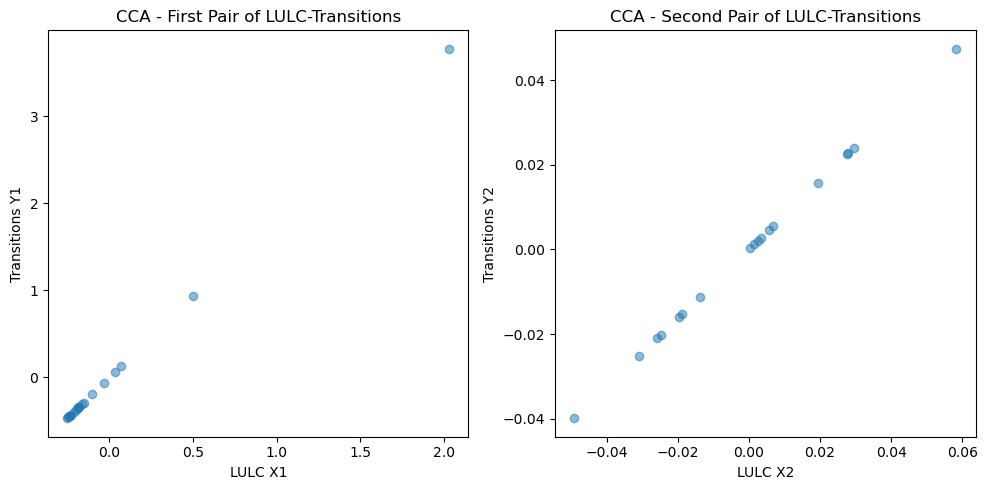

In [70]:
plt.figure(figsize=(10, 5))

# 绘制第一对典型变量
plt.subplot(1, 2, 1)
plt.scatter(X_c[:, 0], Y_c[:, 0], alpha=0.5)
plt.xlabel('LULC X1')
plt.ylabel('Transitions Y1')
plt.title('CCA - First Pair of LULC-Transitions')

# 如果计算了多于一个典型变量对，则绘制第二个
if X_c.shape[1] > 1 and Y_c.shape[1] > 1:
    plt.subplot(1, 2, 2)
    plt.scatter(X_c[:, 1], Y_c[:, 1], alpha=0.5)
    plt.xlabel('LULC X2')
    plt.ylabel('Transitions Y2')
    plt.title('CCA - Second Pair of LULC-Transitions')

plt.tight_layout()
plt.show()

In [36]:
import rcca

In [63]:
Rcca = rcca.CCA(numCC = 2, reg = 0.1, ktype = 'gaussian')

Training CCA, kernel = gaussian, regularization = 0.1000, 2 components
[0.97015132 0.91624741]


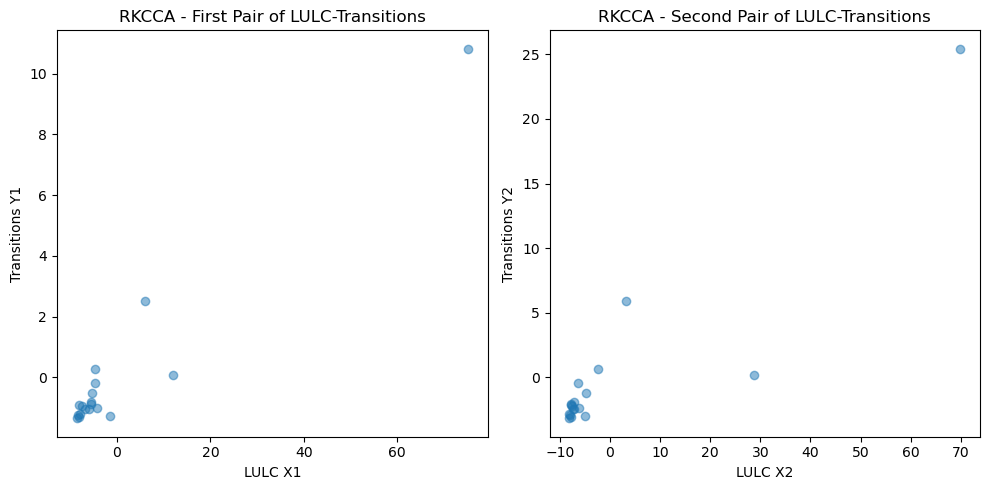

In [71]:
result = Rcca.train([X, Y])
print(result.cancorrs)
X_rc, Y_rc = result.comps

plt.figure(figsize=(10, 5))

# 绘制第一对典型变量
plt.subplot(1, 2, 1)
plt.scatter(X_rc[:, 0], Y_rc[:, 0], alpha=0.5)
plt.xlabel('LULC X1')
plt.ylabel('Transitions Y1')
plt.title('RKCCA - First Pair of LULC-Transitions')

# 如果计算了多于一个典型变量对，则绘制第二个
if X_rc.shape[1] > 1 and Y_rc.shape[1] > 1:
    plt.subplot(1, 2, 2)
    plt.scatter(X_rc[:, 1], Y_rc[:, 1], alpha=0.5)
    plt.xlabel('LULC X2')
    plt.ylabel('Transitions Y2')
    plt.title('RKCCA - Second Pair of LULC-Transitions')

plt.tight_layout()
plt.show()

In [39]:
# 计算距离相关系数
from scipy.spatial.distance import pdist, squareform
from numba import jit, float32

In [40]:
def distcorr(X, Y):
    """ Compute the distance correlation function
    >>> a = [1,2,3,4,5]
    >>> b = np.array([1,2,9,4,4])
    >>> distcorr(a, b)
    0.762676242417
    """
    X = np.atleast_1d(X)
    Y = np.atleast_1d(Y)
    if np.prod(X.shape) == len(X):
        X = X[:, None]
    if np.prod(Y.shape) == len(Y):
        Y = Y[:, None]
    X = np.atleast_2d(X)
    Y = np.atleast_2d(Y)
    n = X.shape[0]
    if Y.shape[0] != X.shape[0]:
        raise ValueError('Number of samples must match')
    a = squareform(pdist(X))
    b = squareform(pdist(Y))
    A = a - a.mean(axis=0)[None, :] - a.mean(axis=1)[:, None] + a.mean()
    B = b - b.mean(axis=0)[None, :] - b.mean(axis=1)[:, None] + b.mean()
    
    dcov2_xy = (A * B).sum()/float(n * n)
    dcov2_xx = (A * A).sum()/float(n * n)
    dcov2_yy = (B * B).sum()/float(n * n)
    dcor = np.sqrt(dcov2_xy)/np.sqrt(np.sqrt(dcov2_xx) * np.sqrt(dcov2_yy))
    return dcor

In [72]:
print(distcorr(X, Y))

0.9335751562094027


In [2]:
df1_r = pd.read_excel('Analysis_Table.xlsx', sheet_name='LULC_raw')
df2_r = pd.read_excel('Analysis_Table.xlsx', sheet_name='Change_raw')
df3_r = pd.read_excel('Analysis_Table.xlsx', sheet_name='Extent_raw')
df4_r = pd.read_excel('Analysis_Table.xlsx', sheet_name='Occurence_raw')
df5_r = pd.read_excel('Analysis_Table.xlsx', sheet_name='Recurrence_raw')
df6_r = pd.read_excel('Analysis_Table.xlsx', sheet_name='Seasonality_raw')
df7_r = pd.read_excel('Analysis_Table.xlsx', sheet_name='Transitions_raw')

In [11]:
# 获取总和数据
total1 = df1_r.iloc[-1][1:].values
total2 = df2_r.iloc[-1][1:].values
total3 = df3_r.iloc[-1][1:].values
total4 = df4_r.iloc[-1][1:].values
total5 = df5_r.iloc[-1][1:].values
total6 = df6_r.iloc[-1][1:].values
total7 = df7_r.iloc[-1][1:].values